In [1]:
#Loaded the libraries

import numpy as np 
import pandas as pd 
import seaborn as sns
from numpy import floor
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt                            
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_curve
from sklearn import datasets, neighbors


import warnings                                            
warnings.simplefilter(action='ignore')     

In [2]:
#loading dataset

df=pd.read_csv("C:\\Users\\Manish\\Downloads\\DS3_C6_S2_Classification_BankChurn_Data_Project.csv")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
new_df=df.copy()      

## Data Preparation

In [4]:
#Checking null values
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
#checking datatypes
df.dtypes

CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [6]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography             11
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [7]:
#Dropping columns

df=df.drop(['Surname','CustomerId'], axis=1)

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## EDA

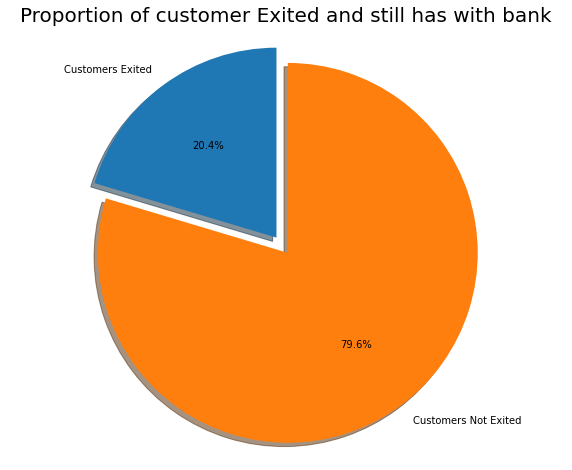

In [9]:
labels = 'Customers Exited', 'Customers Not Exited'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer Exited and still has with bank", size = 20)
plt.show()

So, 20.4% of the customers have exited. So the baseline model could be to predict that 20% of the customers will exit



### Univariate Analysis

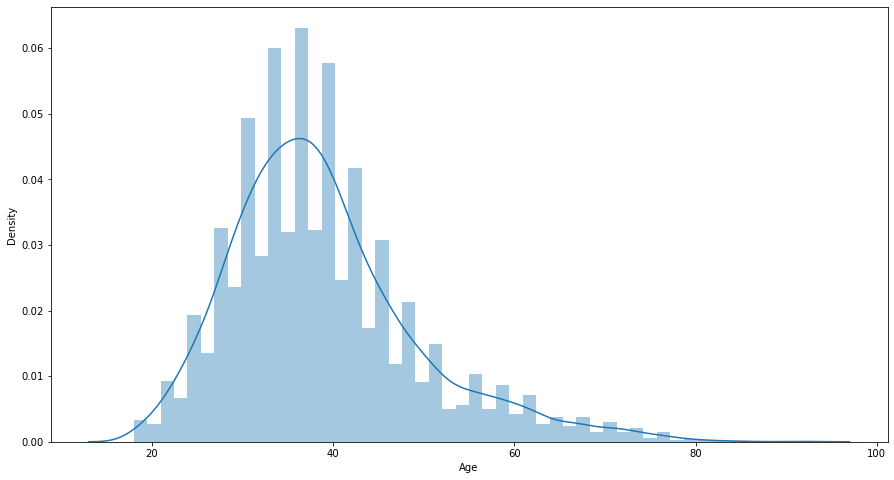

In [10]:
# plotting the plot for univariate analysis
fig, ax=plt.subplots(figsize=(15,8))
ans_plot=sns.distplot(df["Age"])

### Bivariate Analysis

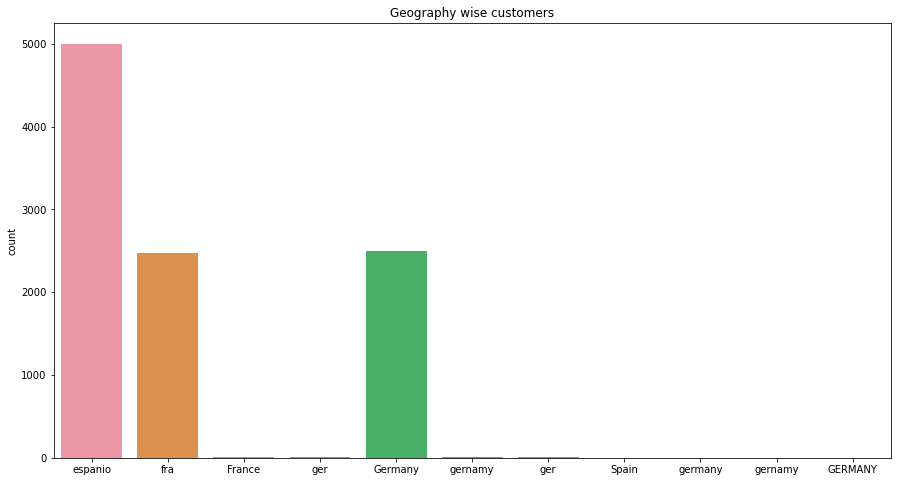

In [11]:
# plottin g plot for bivariate analysis
fig, ax=plt.subplots(figsize=(15,8))
sns.countplot(x=new_df.Geography.values,data=new_df)
labels=[item.get_text() for item in ax.get_xticklabels()]
labels[0]='espanio'
labels[1]='fra'
labels[2]='France'
labels[3]='ger'
labels[4]='Germany'
labels[5]='gernamy'
labels[7]='Spain'
ax.set_xticklabels(labels)
ax.set_title("Geography wise customers")
plt.show()

### Multivariate Analysis

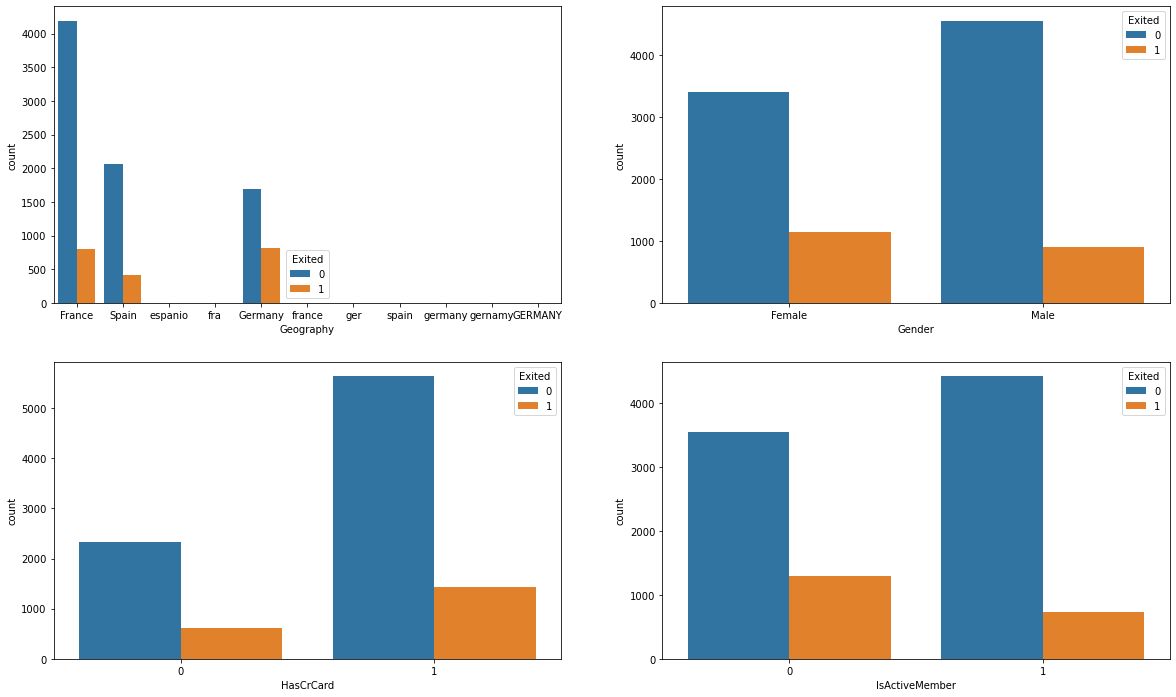

In [12]:
# We first review the 'Status' relation with categorical variables

fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[1][1])
plt.show()

Exited: 0 Means No,
        1 Means Yes

We can see here that:

Germany has more number of exits.

Female customers are more likely to exit.

Customers who have credit card have more exits in comparison to no card.

Active members are less likely to exit.

In [13]:
#correlation

corr=df.corr()
corr

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


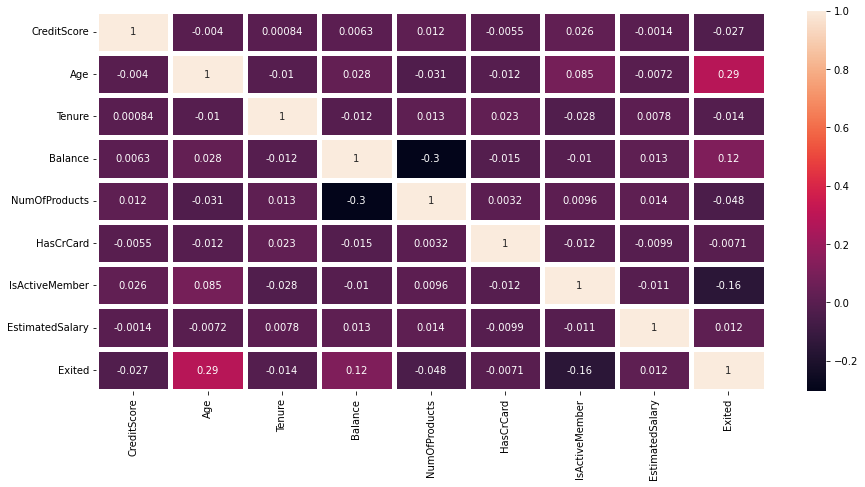

In [14]:
#plotting the plot of correlation matrix

fig, ax = plt.subplots(figsize=(15, 7))
sns.heatmap(corr, annot = True,linewidth = 5)
plt.show()

## Data Preprocessing

In [15]:
#One hot encoding for categorial data

df = pd.get_dummies(df, columns =["Geography", "Gender"], drop_first = False)

In [16]:
Y= df[['Exited']]
category_df = df[["Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"]]
X= df.drop(labels=["Exited","Geography_Germany", "Geography_France","Geography_Spain", "Gender_Male","Gender_Female" ,"HasCrCard","IsActiveMember"],axis=1)
         

In [17]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,...,Geography_Spain,Geography_espanio,Geography_fra,Geography_france,Geography_ger,Geography_germany,Geography_gernamy,Geography_spain,Gender_Female,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,1,...,0,0,0,0,0,0,0,0,1,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,...,1,0,0,0,0,0,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,...,0,0,0,0,0,0,0,0,1,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,...,0,0,0,0,0,0,0,0,1,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,1,...,0,0,0,0,0,0,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,1,...,0,0,0,0,0,0,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,1,...,0,0,0,0,0,0,0,0,1,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,...,0,0,0,0,0,0,0,0,0,1


#### Standard Scaler

In [18]:
#scaling the data 

from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
std = std_scl.fit(X)
X = std.transform(X) 

In [19]:
# splitting data into train and test data 

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y, random_state = 0)


## Logistic Regression

In [20]:
#fitting the data (logistic regression)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predicting data
y_pred = logreg.predict(X_test)


In [21]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
# checking model score
acc_log = round(logreg.score(X_train, y_train) * 100, 2)
acc_log

78.17

In [23]:
coeff_df = pd.DataFrame(new_df.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
1,CreditScore,0.656517
3,Gender,0.310556
10,EstimatedSalary,0.150371
5,Tenure,0.046860
9,IsActiveMember,0.029007
7,NumOfProducts,0.008049
8,HasCrCard,0.006106
4,Age,-0.045184
6,Balance,-0.051055
11,Exited,-0.064337


In [24]:
logreg.intercept_

array([-1.50549537])

In [25]:
logreg.score(X_test, y_test)

0.7768

In [26]:
#confusion matrix

confusion_matrix(y_test,y_pred)

array([[1909,   82],
       [ 476,   33]], dtype=int64)

In [27]:
print('accuracy:', accuracy_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred, average='weighted'))
print('f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('precision:', precision_score(y_test, y_pred))

accuracy: 0.7768
recall: 0.7768
f1-score: 0.7163826958233723
precision: 0.28695652173913044


In [28]:
roc = roc_auc_score(y_test, logreg.predict_proba(X_test)[:,1])
roc

0.7366380539539914

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

auc = roc_auc_score(y_test, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.512


In [30]:
ns_probs= [0 for _ in range(len(y_test))]
lr_probs= logreg.predict(X_test)

No skill: ROC AUC=0.500
Logistic: ROC AUC=0.512


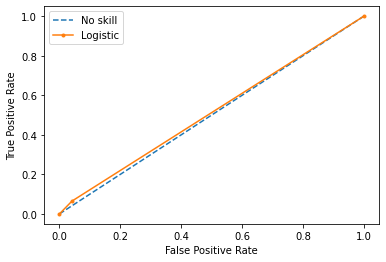

In [31]:
lr_probs=lr_probs[:]

ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test,lr_probs)

print("No skill: ROC AUC=%.3f"%(ns_auc))
print("Logistic: ROC AUC=%.3f"%(lr_auc))

ns_fpr,ns_tpr,_=roc_curve(y_test,ns_probs)
lr_fpr,lr_tpr,_=roc_curve(y_test,lr_probs)
plt.plot(ns_fpr,ns_tpr,linestyle='--', label='No skill')
plt.plot(lr_fpr,lr_tpr, marker='.',label='Logistic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()            

AUC = AREA UNDER CURVE it is the measure of the ability of a classifier to distinguish between classes and is used as summary of ROC curve. The higher the AUC, the better the performance of the model at distinguishing between positive and negative classes.

ROC = RECEIVER OPERATING CHARACTERISTIC CURVE it shows the performance of a model at all classification thresholds. This curve plots two parameters: TRUE POSITIVE RATE(TPR) FALSE POSITIVE RATE(FPR)

There is not a big difference between ROC AUC(No skill)  and ROC AUC(logistic) so that's why here we can't se a ROC AUC curve.

## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [47]:
y_pred =knn.predict(X_test)

In [48]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
knn.score(X_test, y_test)

0.8156

In [50]:
from sklearn.model_selection import cross_val_score

knn_cv = KNeighborsClassifier(n_neighbors=3)    # n_neighbors are the number of neighbors that will vote for the class of target point by default number is 5
cv_scores=cross_val_score(knn_cv,X_test,y_test,cv=5)  # cv = 5 means fitting the model and computing the score for 5 consecutives times(with different splits each time).
print("CV SCore:",cv_scores)
print("CV Scores mean:{}".format(np.mean(cv_scores))) 

CV SCore: [0.832 0.816 0.814 0.814 0.796]
CV Scores mean:0.8144


In [51]:
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred,average='weighted'))
print("f1-score:",f1_score(y_test,y_pred,average='weighted'))
print("Precision:",precision_score(y_test,y_pred))

Accuracy score: 0.8156
recall: 0.8156
f1-score: 0.8087827331814015
Precision: 0.5571428571428572


## Decision Tree Classifier

In [52]:
clf=DecisionTreeClassifier(max_depth=3)
clf=clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [53]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [54]:
confusion_matrix(y_test,y_pred)

array([[1758,  233],
       [ 212,  297]], dtype=int64)

In [55]:
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("recall:", recall_score(y_test,y_pred,average='weighted'))
print("f1-score:",f1_score(y_test,y_pred,average='weighted'))
print("Precision:",precision_score(y_test,y_pred))

Accuracy score: 0.822
recall: 0.822
f1-score: 0.8233269945005188
Precision: 0.560377358490566


## Random Forest Classifier

In [56]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100) #n_estimators means number of trees we want to build before taking maximum voting or average predictions, higher number of trees gives better performance. 
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
y_pred=rfc.predict(X_test)

In [58]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
print("Accuracy score:",accuracy_score(y_test,y_pred))
print("recall:",recall_score(y_test,y_pred,average='weighted'))
print("f1_score:",f1_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy score: 0.8332
recall: 0.8332
f1_score: 0.48708487084870844
Precision 0.6513157894736842


# CONCLUSION:

### We performed different classifier models and observed that Logistic Regression model accuracy is 77.68%, KNeighborsClaasifier model is 81.56 % accurate, Decision Tree model accuracy is 82.20% and Random Forest Classifier is 83.32% accurate.

### So, here we can see that Random Forest Classifier model/algorithm is the best model with 83.32% accuracy.